In [0]:
! apt-get install libgeos-3.5.0
! apt-get install libgeos-dev
! pip install https://github.com/matplotlib/basemap/archive/master.zip

In [0]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import json

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
def plot_map(site, coordinates, isp):
  print(site)
  # create new figure, axes instances.
  fig=plt.figure()
  ax=fig.add_axes([.5,.5,5,5])

  # setup mercator map projection.
  m = Basemap(llcrnrlon=-140.,llcrnrlat=20.,urcrnrlon=20.,urcrnrlat=70.,\
              rsphere=(6378137.00,6356752.3142),\
              resolution='l',projection='merc',\
              lat_0=40.,lon_0=-20.,lat_ts=20.)

  # set and plot wifi/mobile network location as starting point
  start_coord = "your starting points"
  start_lon_lat = start_coord.split(',')
  start_lon = float(start_lon_lat[1])
  start_lat = float(start_lon_lat[0])
  m.plot(start_lon, start_lat, latlon=True, marker='D', markersize=14, color='#FFFF66', zorder=10)

  # iterate through given set of server coordinates
  coordinates.insert(0, start_coord)
  while '37.7510,-97.8220' in coordinates:
    coordinates.remove('37.7510,-97.8220')
  while 'unknown' in coordinates:
    coordinates.remove('unknown')
  while len(coordinates) > 1:
    # connect them and set markers
    first_coord = coordinates[0]
    sec_coord = coordinates[1]
    nylat = float(first_coord.split(',')[0])
    nylon = float(first_coord.split(',')[1])
    lonlat = float(sec_coord.split(',')[0])
    lonlon = float(sec_coord.split(',')[1])
    m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=4,color='#d4f1ff')
    if len(coordinates) == 2:
      m.plot(nylon, nylat, latlon=True, marker='X', markersize=14, color='#ff7686', zorder=10)
    else:
      m.plot(nylon, nylat, latlon=True, marker='o',color='#FFFF66', zorder=10)
    # find midpoints between two coordinates
    lat = [nylat, lonlat]
    long = [nylon, lonlon]
    mid_lat = sum(lat)/len(lat)
    mid_lon = sum(long)/len(long)
    # annotate the servers with ISP-providers
    x, y = m(mid_lon, mid_lat)
    provider = isp[0]
    if provider != 'unknown':
      plt.text(x, y, provider, fontsize=20, fontweight='bold',
                  ha='left',va='bottom',color='w', zorder=10)
    # shorten lists
    isp = isp[1:]
    coordinates = coordinates[1:]
  

  m.drawcoastlines(color='#fac9cf')
  m.fillcontinents(color='#00cccc', lake_color='#fac9cf')
  m.drawcountries(color='#00ffec')
  m.drawmapboundary(fill_color='#fac9cf')
  # draw parallels
  m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
  # draw meridians
  m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])
  ax.set_title('{}'.format(site), fontsize=18)
  plt.savefig('test_trace.pdf') #/content/gdrive/My Drive/undnet/{}.png'.format(site.replace('.', '_')), dpi=100
  plt.show()

ouiouioui.space


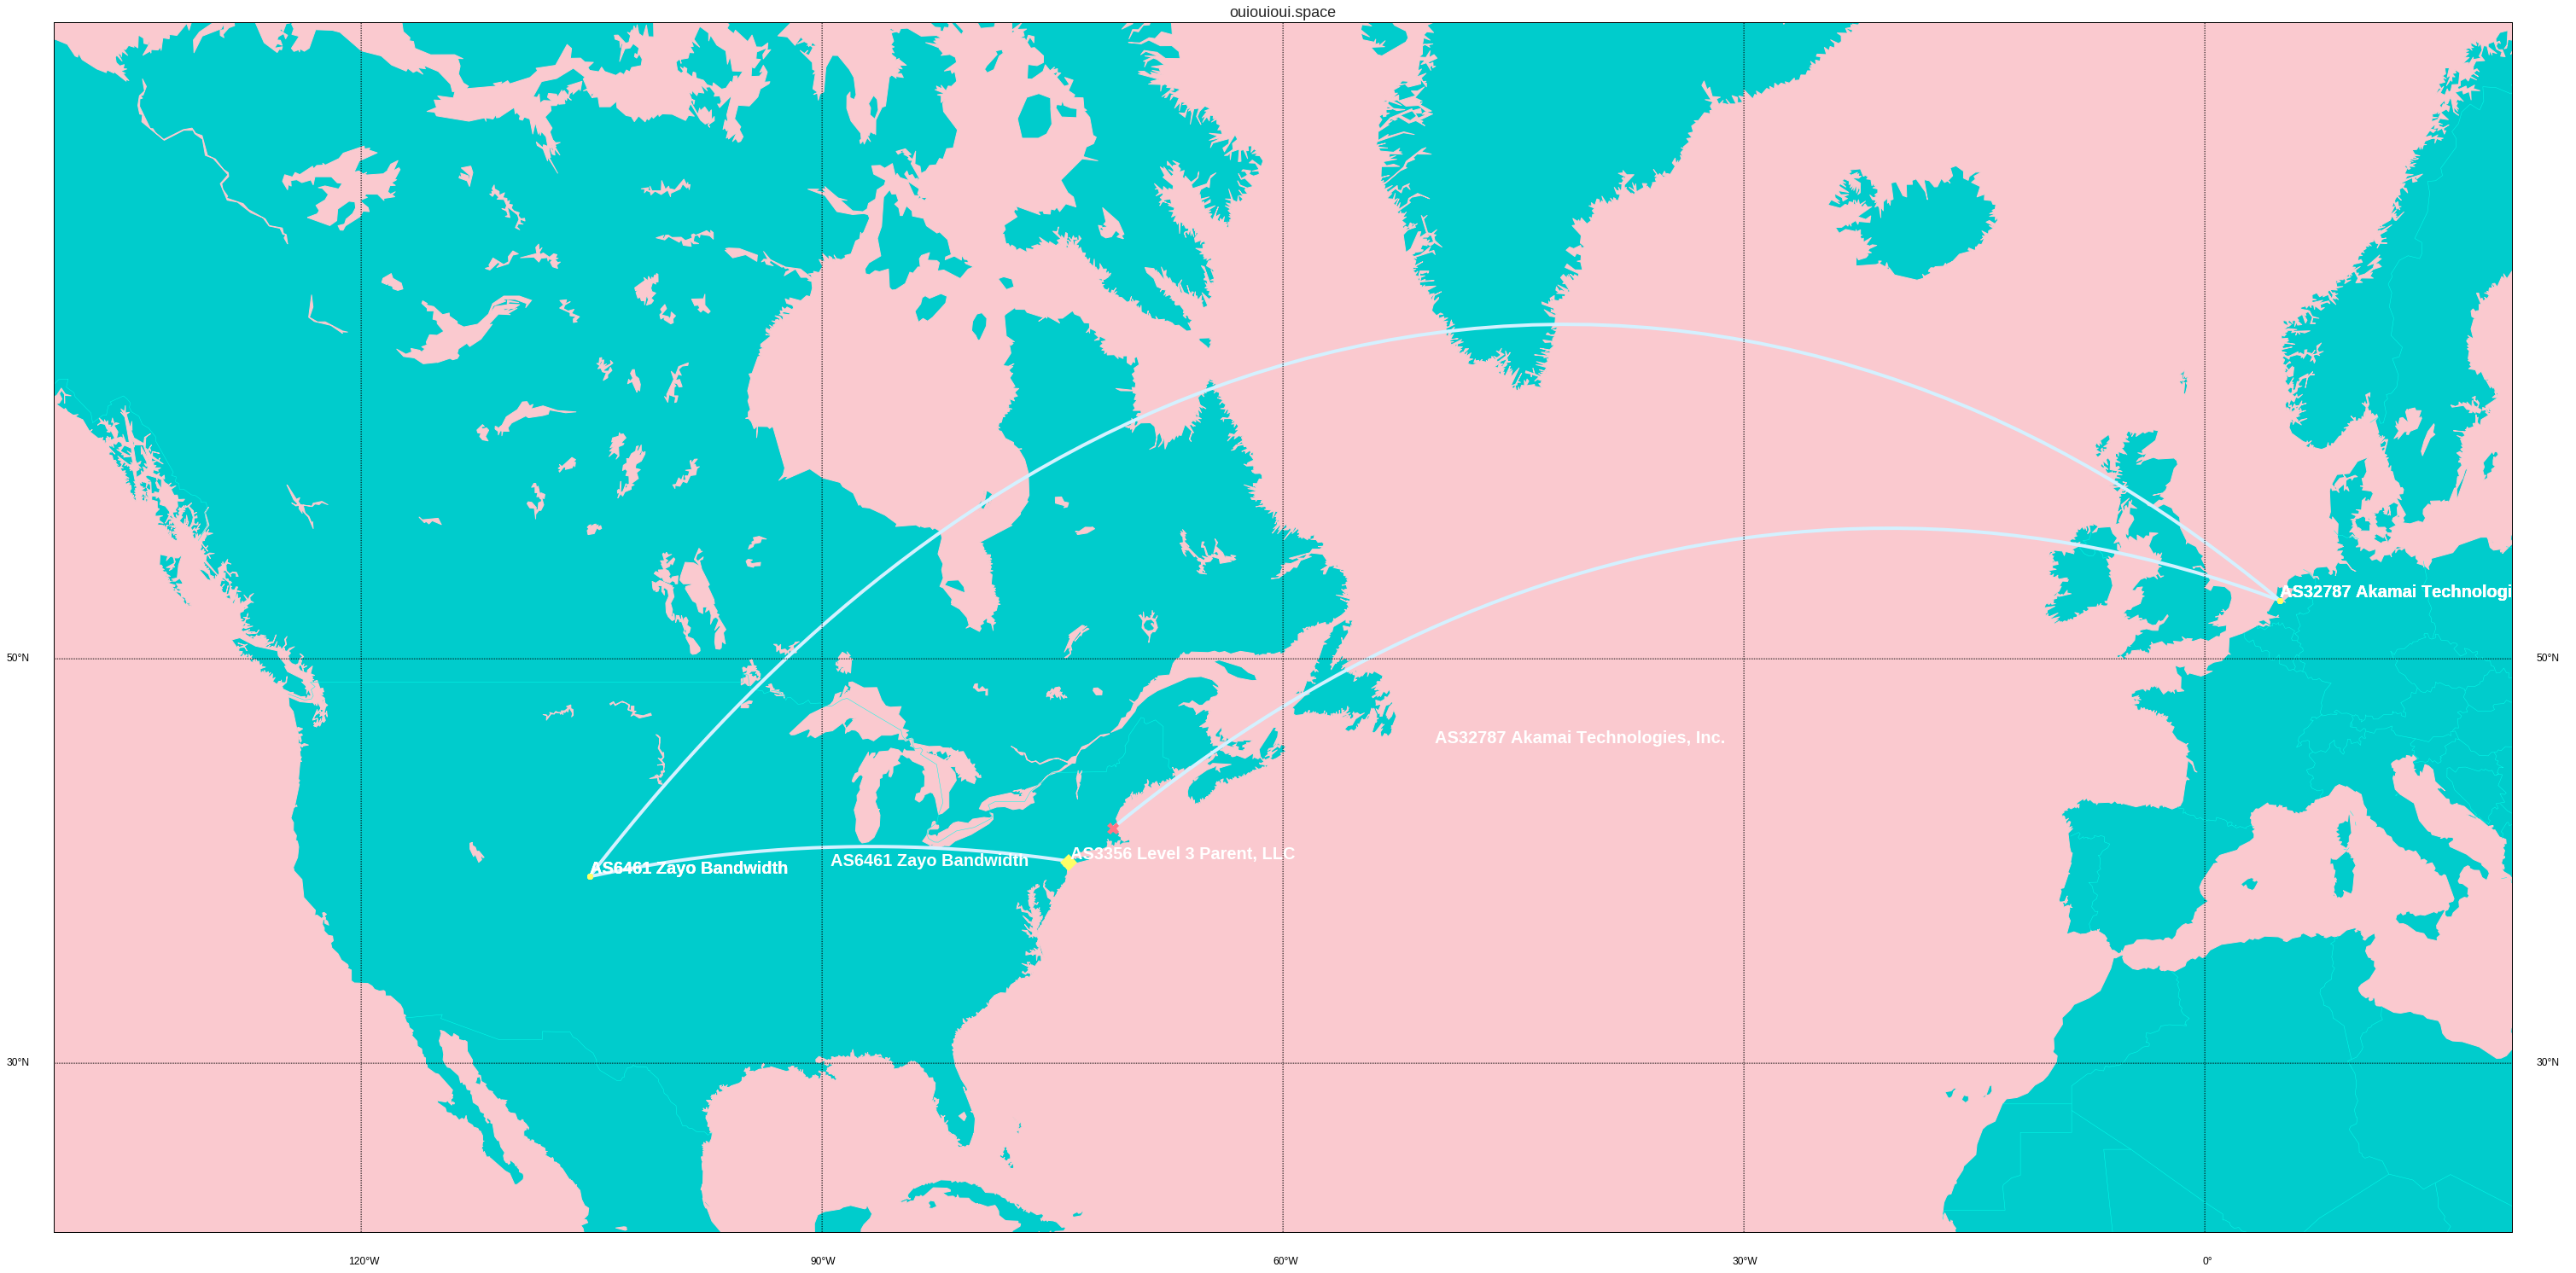

nts.live


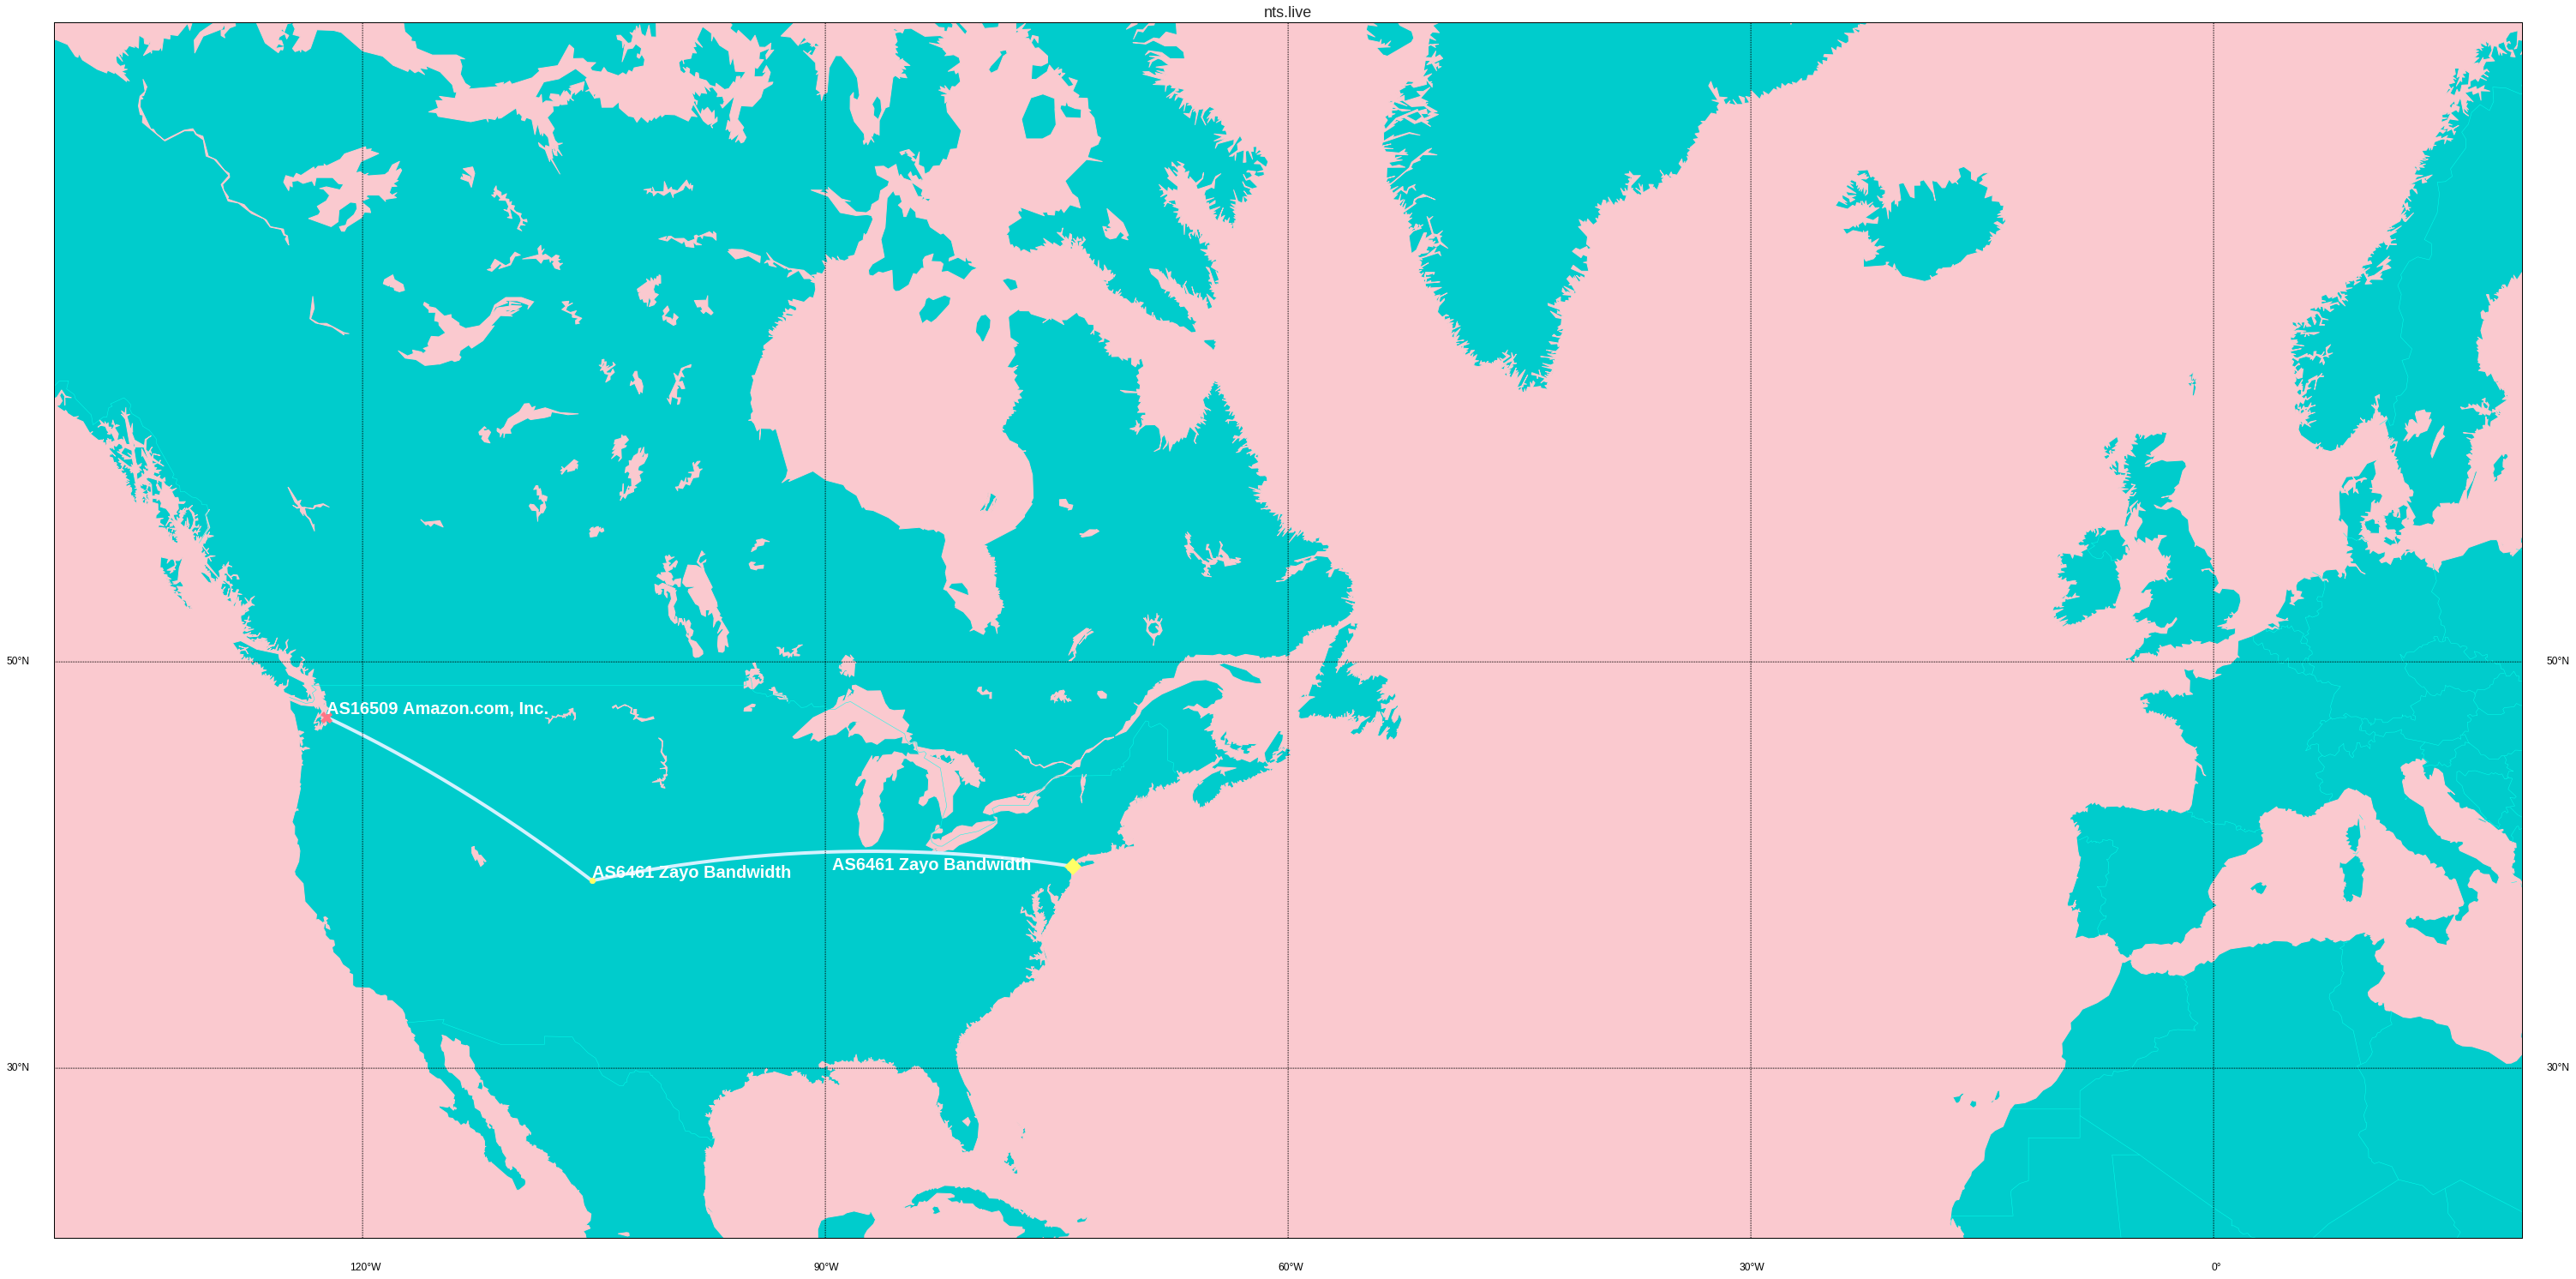

home.nyu.edu


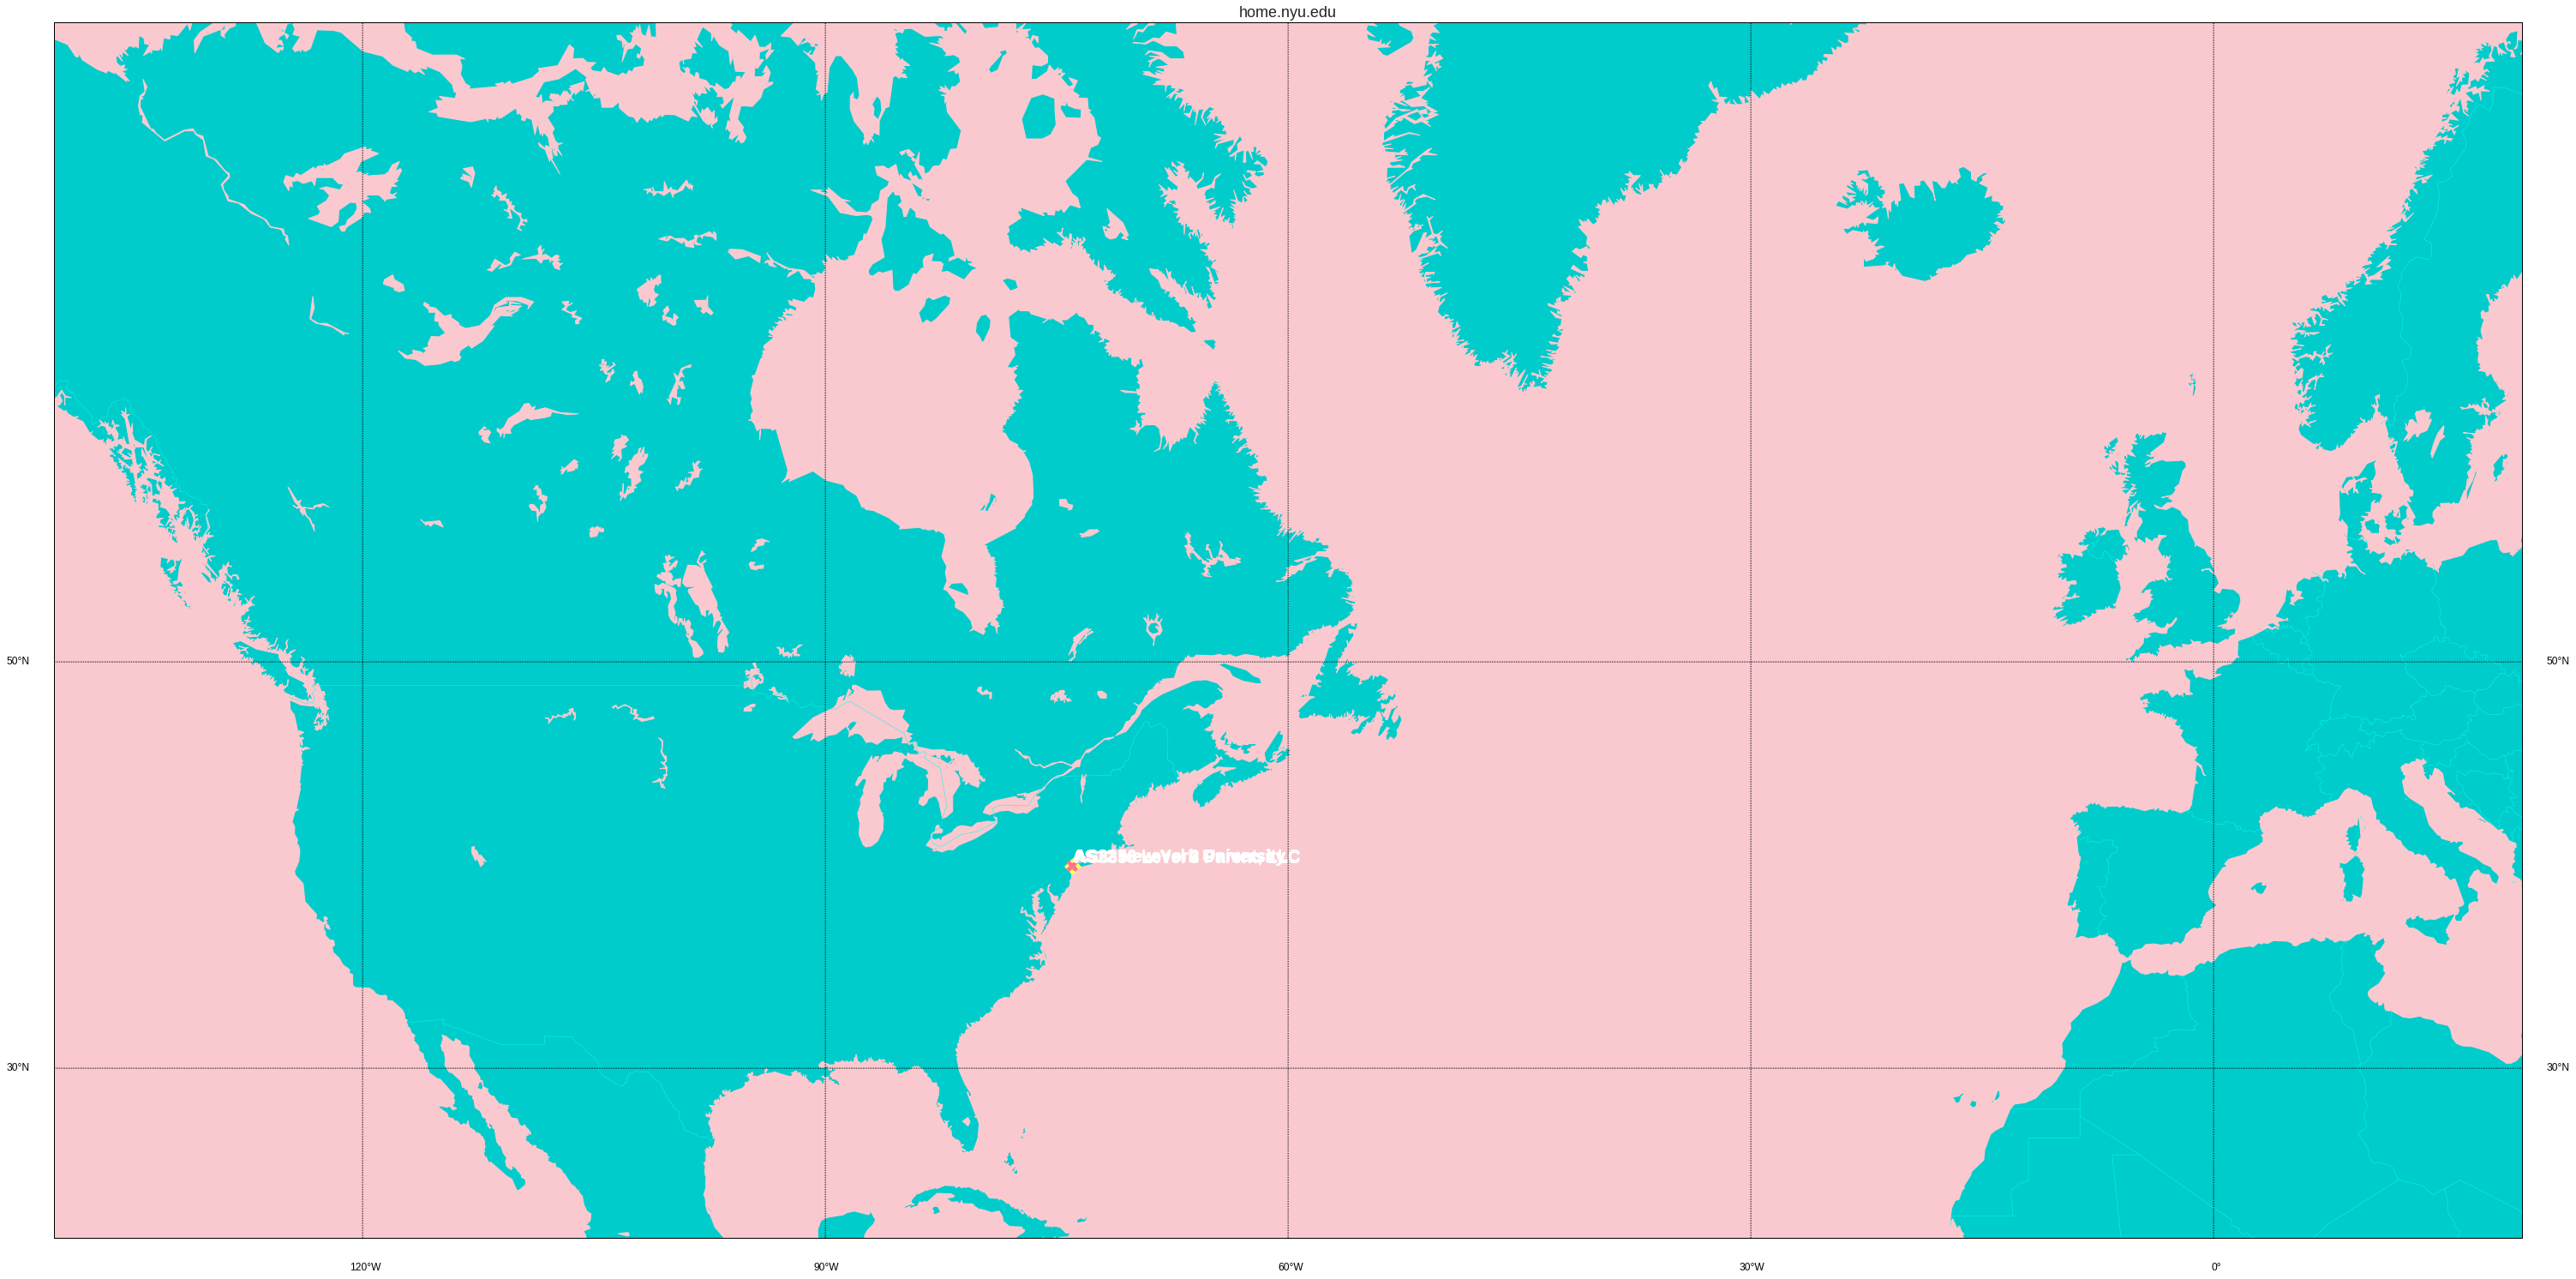

In [27]:
data = "/content/gdrive/My Drive/undnet/traceroute_data/traceroute_itp_mobile.txt"
with open(data) as trace_data:
  traceroute = json.loads(trace_data.read())
for key in traceroute:
  plot_map(key, traceroute[key]['coordinates'], traceroute[key]['isp'] )